In [1]:
# Importing Libraries

import numpy as np 
import pandas as pd 
import re
import nltk 
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
# Importing the training data

train_raw = pd.read_csv('input/train.csv')

In [3]:
# Reviewing the data imported

train_raw # imported 146,810 reviews, 3 columns

,review_id,review,rating
0,0,Ga disappointed neat products .. Meletot Hilsn...,1
1,1,"Rdtanya replace broken glass, broken chargernya",1
2,2,Nyesel bngt dsni shopping antecedent photo mes...,1
3,3,Sent a light blue suit goods ga want a refund,1
4,4,Pendants came with dents and scratches on its ...,1
...,...,...,...
146806,146806,Excellent product quality delivery speed is ve...,5
146807,146807,thanks gan,5
146808,146808,Awesome awesome quality merchandise value CP ...,5
146809,146809,Nice Packing boxes made effective price .........,5


In [4]:
# Reviewing some overview data for cleaning preparation

train_raw.head(20)

,review_id,review,rating
0,0,Ga disappointed neat products .. Meletot Hilsn...,1
1,1,"Rdtanya replace broken glass, broken chargernya",1
2,2,Nyesel bngt dsni shopping antecedent photo mes...,1
3,3,Sent a light blue suit goods ga want a refund,1
4,4,Pendants came with dents and scratches on its ...,1
5,5,Dg yg depending being sent in photos,1
6,6,Hours not a hologram,1
7,7,"Shop fraudulent business. we put two lamps, on...",1
8,8,"Well, according to Price",1
9,9,"Pictures and names of elise 7154, but the bran...",1


In [5]:
# Creating plot area

plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


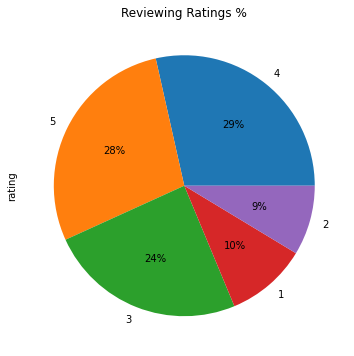

In [6]:
# Looking at the size of reviews & rating size

train_raw.rating.value_counts().plot(kind = 'pie', autopct = '%1.0f%%')
plt.title("Reviewing Ratings %")

plt.show()

From the pie chart / exploratory analysis, we can see that majority of the reviews are positive (falling into 4 - 5 rating) followed by neutral reviews and lastly 19% of negative reviews (1 - 2 rating) based off our training set.

This can be interesting if we try to analyze the common words of the various reviews - for now, we can move into cleaning of the data

In [7]:
# Extract the labels & sentiments from the training data

features = train_raw.iloc[:, 1].values
labels = train_raw.iloc[:, 2].values

In [23]:
# Checking if we extracted from the correct column
i = 54321

while i < 54326:
    print(features[i])
    print("LABEL:", labels[i], "\n")
    i += 1

Respond quickly good seller Tuitui Tui!
LABEL: 3 

Large sya .. It never fit in my hand
LABEL: 3 

Semogaaaaaa cocokkkkkk yaaaaaaaa bagussssssssssssssss
LABEL: 3 

Prices steady delivery okehh I like sekalii. Sering2 yes flash sale
LABEL: 3 

 Product quality good price good product delivery speed well good seller Response
LABEL: 3 



In [25]:
processed_features = []

for sentence in range(0, len(features)):
    
    # Remove all special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))
    
    # Remove all words that include digits / numbers
    processed_feature = re.sub(r'\w*\d\w*', ' ', processed_feature)
    
    # Remove all single characters
    processed_feature = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    
    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)
    
    # Substituing multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags = re.I)
    
    # Converting to lowercase
    processed_featured = processed_feature.lower()
    
    # Append cleaned review to processed list
    processed_features.append(processed_feature)

In [27]:
# Checking if labels / reviews have been cleaned up

i = 54321

while i < 54326:
    print(processed_features[i], "\n")
    i += 1

Respond quickly good seller Tuitui Tui  

Large sya It never fit in my hand 

Semogaaaaaa cocokkkkkk yaaaaaaaa bagussssssssssssssss 

Prices steady delivery okehh like sekalii yes flash sale 

 Product quality good price good product delivery speed well good seller Response 



In [11]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 2500, min_df = 7, max_df = 0.8, stop_words = stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(processed_features, labels, test_size = 0.2, random_state = 0)

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
# Training the model

# model = RandomForestClassifier(n_estimators = 200, random_state = 0, verbose = 3)
model_2 = RandomForestClassifier(n_estimators = 300, random_state = 0, verbose = 3, n_jobs = -1, oob_score = True')
                                 
model_2.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 300building tree 2 of 300
building tree 3 of 300
building tree 4 of 300building tree 5 of 300


building tree 6 of 300building tree 7 of 300
building tree 8 of 300

building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.4min


building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of 300
building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53 of 300
building tree 54 of 300
building tree 55 of 300
building tree 56 of 300
building tree 57 of 300
building tree 58 of 300
building tree 59 of 300
building tree 60 of 300
building tree 61 of 300
building tree 62 of 300
building tree 63 of 300
building tree 64 of 300
building tree 65

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  7.9min


building tree 121 of 300
building tree 122 of 300
building tree 123 of 300
building tree 124 of 300
building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
building tree 133 of 300
building tree 134 of 300
building tree 135 of 300
building tree 136 of 300
building tree 137 of 300
building tree 138 of 300
building tree 139 of 300
building tree 140 of 300
building tree 141 of 300
building tree 142 of 300
building tree 143 of 300
building tree 144 of 300
building tree 145 of 300
building tree 146 of 300
building tree 147 of 300
building tree 148 of 300
building tree 149 of 300
building tree 150 of 300
building tree 151 of 300
building tree 152 of 300
building tree 153 of 300
building tree 154 of 300
building tree 155 of 300
building tree 156 of 300
building tree 157 of 300
building tree 158 of 300
building tree 159 of 300
building tree 160 of 300


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 18.1min


building tree 280 of 300
building tree 281 of 300
building tree 282 of 300
building tree 283 of 300
building tree 284 of 300
building tree 285 of 300
building tree 286 of 300
building tree 287 of 300
building tree 288 of 300
building tree 289 of 300
building tree 290 of 300
building tree 291 of 300
building tree 292 of 300
building tree 293 of 300
building tree 294 of 300
building tree 295 of 300
building tree 296 of 300
building tree 297 of 300
building tree 298 of 300
building tree 299 of 300
building tree 300 of 300


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 19.5min finished


RandomForestClassifier(n_estimators=300, n_jobs=-1, oob_score=True,
                       random_state=0, verbose=3)

In [16]:
# Saving (Pickle!) the model

filename = "rfc_model_02.pkl"
with open(filename, 'wb') as file:
    pickle.dump(model_2, file)

In [17]:
# predictions = model.predict(x_test)
predictions = model_2.predict(x_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    5.7s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    6.2s finished


In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1664  154  736  240  156]
 [ 532  515 1069  235  192]
 [ 495  173 4259 1178  970]
 [ 202   44 1324 3673 3156]
 [ 210   46 1346 3585 3209]]
              precision    recall  f1-score   support

           1       0.54      0.56      0.55      2950
           2       0.55      0.20      0.30      2543
           3       0.49      0.60      0.54      7075
           4       0.41      0.44      0.42      8399
           5       0.42      0.38      0.40      8396

    accuracy                           0.45     29363
   macro avg       0.48      0.44      0.44     29363
weighted avg       0.46      0.45      0.45     29363

0.4536321220583728


In [32]:
# Checking the prediction output accurate & is between 1 to 5

print(min(predictions))
print(max(predictions))

1
5
